# What is the probability of a large nuclear war
- Assuming a climate affect of < -3oC cooling (i.e. 16 Tg of stratospheric soot according to Xia et al., (2022).)

### Probability Density Function of nuclear weapon detonation before 2050
- Using halfway between 2050 and now: 2038 as target year
- Based on n = 100 and n = 1000 from metaculus: https://www.metaculus.com/questions/11602/number-of-nuclear-detonations-by-2050/
- Deployed nuclear weapons n = 9412 is based on linear interpolation of deployed weapons stockpile inspired by Vasco: https://forum.effectivealtruism.org/posts/gktZ8zuzyh7HEgjfc/famine-deaths-due-to-the-climatic-effects-of-nuclear-war#Probability_of_escalation_into_large_nuclear_war

In [1]:
#####################################
#Probabilities of a nuclear exchange#
#Maintainer: Christopher Chan       #
#Date: 2023-07-19                   #
#Version: 0.9.9                     #
#####################################

import os
import random
import pathlib
import numpy as np
import sympy as sym
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from datetime import datetime
from scipy.interpolate import CubicSpline
from scipy.stats import beta
from scipy.optimize import least_squares
from matplotlib.ticker import ScalarFormatter, FuncFormatter

data_output = pathlib.Path("../data/07_model_output")

# Set parameters
# Nukes of linear interpolation halfway between 2032 and 2052
# To find out how many nukes between now and halfway to 2050
# https://www.metaculus.com/questions/12722/global-nuclear-warhead-stockpiles/

nukes_2032 = (8.29+10.7)*10**3/2
nukes_2052 = (4.84+13.6)*10**3/2

target_year = int(datetime.now().year + (2050 - datetime.now().year)/2)
year_2050 = int(2050)

#cs = CubicSpline(np.array([2032, 2052]), np.array([nukes_2032, nukes_2052]))
max_nukes = int(np.interp(target_year, np.array([2032, 2052]), np.array([nukes_2032, nukes_2052])))

print(f"Linear interpolation of nukes in {target_year} = {max_nukes}")

def beta_conj(year:int, deton_year1=None, deton_year2=None) -> tuple[list, list, list, list]:
  conjugated = []
  conjugated_PDF = []
  conjugated_CDF = []
  PDF_linspace = []
  det_nom = 1
  det_denom = int(datetime.now().year-1945)

  print(f"Detonation happening at year {deton_year1} and {deton_year2}.")
     
  for i in range(year):
    if ((deton_year1 is not None and i == deton_year1) or (deton_year2 is not None and i == deton_year2)):
      det_chance = 1
    else:
      #det_chance = random.randint(1, det_denom)
      det_chance = 0

    if ((det_chance == 1) and (i == 0)):
      det_nom += 1
      det_denom -= 1

      x_PDF = np.linspace(beta.ppf(0, det_nom, det_denom),
                          beta.ppf(0.95, det_nom, det_denom), 1000)

      current_prob = beta.median(det_nom, det_denom)
      current_probPDF = beta.pdf(x_PDF, det_nom, det_denom)
      current_probCDF = beta.cdf(x_PDF, det_nom, det_denom)
      conjugated.append(current_prob)
      conjugated_PDF.append(current_probPDF)
      conjugated_CDF.append(current_probCDF)
      PDF_linspace.append(x_PDF)
      print(f"Initial Year {datetime.now().year+i}: Nuclear detonation occurred. Beta probability is {det_nom, det_denom} for this year.")

    elif ((det_chance == 0) and (i == 0)):

      x_PDF = np.linspace(beta.ppf(0, det_nom, det_denom),
                          beta.ppf(0.95, det_nom, det_denom), 1000)

      current_prob = beta.median(det_nom, det_denom)
      current_probPDF = beta.pdf(x_PDF, det_nom, det_denom)
      current_probCDF = beta.cdf(x_PDF, det_nom, det_denom)
      conjugated.append(current_prob)
      conjugated_PDF.append(current_probPDF)
      conjugated_CDF.append(current_probCDF)
      PDF_linspace.append(x_PDF)
      print(f"Initial Year {datetime.now().year+i}: Nuclear detonation NOT occurred. Beta probability is {det_nom, det_denom} for this year.")

    elif ((det_chance == 1) and (i != 0)):
      det_nom += 1
      #det_denom += 1

      x_PDF = np.linspace(beta.ppf(0, det_nom, det_denom),
                          beta.ppf(0.95, det_nom, det_denom), 1000)

      next_prob = beta.median(det_nom, det_denom)
      next_probPDF = beta.pdf(x_PDF, det_nom, det_denom)
      next_probCDF = beta.cdf(x_PDF, det_nom, det_denom)
      conjugated.append(next_prob)
      conjugated_PDF.append(next_probPDF)
      conjugated_CDF.append(next_probCDF)
      PDF_linspace.append(x_PDF)
      print(f"Year {datetime.now().year+i}: Nuclear detonation occurred. Beta probability set to {det_nom, det_denom}.")

    else:
      det_denom += 1

      x_PDF = np.linspace(beta.ppf(0, det_nom, det_denom),
                          beta.ppf(0.95, det_nom, det_denom), 1000)

      next_prob = beta.median(det_nom, det_denom)
      next_probPDF = beta.pdf(x_PDF, det_nom, det_denom)
      next_probCDF = beta.cdf(x_PDF, det_nom, det_denom)
      conjugated.append(next_prob)
      conjugated_PDF.append(next_probPDF)
      conjugated_CDF.append(next_probCDF)
      PDF_linspace.append(x_PDF)
      print(f"Year {datetime.now().year+i}: Nuclear detonation NOT occurred. Beta probability set to {det_nom, det_denom}.")

  return(conjugated, conjugated_PDF, conjugated_CDF, PDF_linspace)

peace_results = beta_conj(year_2050+1 - int(datetime.now().year))
oneNY_results = beta_conj(year_2050+1 - int(datetime.now().year), 2024 - int(datetime.now().year))
one_results = beta_conj(year_2050+1 - int(datetime.now().year), 2029 - int(datetime.now().year))
two_results = beta_conj(year_2050+1 - int(datetime.now().year), 2029 - int(datetime.now().year), 2039 - int(datetime.now().year))

peace_beta, peace_betaPDF, peace_betaCDF, peace_PDFlinspace = peace_results[0], peace_results[1], peace_results[2], peace_results[3]
# One Next Year
oneNY_beta, oneNY_betaPDF, oneNY_betaCDF, oneNY_PDFlinspace = oneNY_results[0], oneNY_results[1], oneNY_results[2], oneNY_results[3]
one_beta, one_betaPDF, one_betaCDF, one_PDFlinspace = one_results[0], one_results[1], one_results[2], one_results[3]
two_beta, two_betaPDF, two_betaCDF, two_PDFlinspace = two_results[0], two_results[1], two_results[2], two_results[3]

print(f"Cumulative Probability of peace beta distribution by {year_2050} is {sum(peace_beta)}")
print(f"Cumulative Probability of 1-detonation next year beta distribution by {year_2050} is {sum(oneNY_beta)}")
print(f"Clmulative Probability of 1-detonation beta distribution by {year_2050} is {sum(one_beta)}")
print(f"Cumulative Probability of 2-detonations beta distribution by {year_2050} is {sum(two_beta)}")

Linear interpolation of nukes in 2037 = 9426
Detonation happening at year None and None.
Initial Year 2024: Nuclear detonation NOT occurred. Beta probability is (1, 79) for this year.
Year 2025: Nuclear detonation NOT occurred. Beta probability set to (1, 80).
Year 2026: Nuclear detonation NOT occurred. Beta probability set to (1, 81).
Year 2027: Nuclear detonation NOT occurred. Beta probability set to (1, 82).
Year 2028: Nuclear detonation NOT occurred. Beta probability set to (1, 83).
Year 2029: Nuclear detonation NOT occurred. Beta probability set to (1, 84).
Year 2030: Nuclear detonation NOT occurred. Beta probability set to (1, 85).
Year 2031: Nuclear detonation NOT occurred. Beta probability set to (1, 86).
Year 2032: Nuclear detonation NOT occurred. Beta probability set to (1, 87).
Year 2033: Nuclear detonation NOT occurred. Beta probability set to (1, 88).
Year 2034: Nuclear detonation NOT occurred. Beta probability set to (1, 89).
Year 2035: Nuclear detonation NOT occurred. Be

In [2]:
def detonation_table(PDF, PDFlinspace, CDF) -> pd.DataFrame:
  beta_df = pd.DataFrame(columns=["year", "linspace", "PDF", "CDF"])

  # Populate the DataFrame with the data for each year
  for year, linspace, pdf, cdf in zip(np.arange(datetime.now().year, datetime.now().year+len(PDFlinspace)+1, 1),
                                 PDFlinspace, PDF, CDF):
      temp_df = pd.DataFrame({
          "year": year,
          "linspace": linspace,
          "PDF": pdf,
          "CDF": cdf
      })
      beta_df = pd.concat([beta_df, temp_df], ignore_index=True)

  # Convert the 'year' column to a categorical type for proper legend handling
  beta_df['year'] = beta_df['year'].astype('category')
  print(beta_df.head)

  return beta_df

peace_df = detonation_table(peace_betaPDF, peace_PDFlinspace, peace_betaCDF)
oneNY_df = detonation_table(oneNY_betaPDF, oneNY_PDFlinspace, oneNY_betaCDF)
one_df = detonation_table(one_betaPDF, one_PDFlinspace, peace_betaCDF)
two_df = detonation_table(two_betaPDF, two_PDFlinspace, peace_betaCDF)

<bound method NDFrame.head of        year  linspace        PDF       CDF
0      2024  0.000000  79.000000  0.000000
1      2024  0.000037  78.770807  0.002938
2      2024  0.000074  78.542271  0.005868
3      2024  0.000112  78.314389  0.008789
4      2024  0.000149  78.087160  0.011702
...     ...       ...        ...       ...
26995  2050  0.028015   5.467437  0.949388
26996  2050  0.028043   5.450990  0.949542
26997  2050  0.028071   5.434593  0.949695
26998  2050  0.028099   5.418244  0.949848
26999  2050  0.028128   5.401944  0.950000

[27000 rows x 4 columns]>
<bound method NDFrame.head of        year  linspace       PDF       CDF
0      2024  0.000000  0.000000  0.000000
1      2024  0.000059  0.360099  0.000011
2      2024  0.000117  0.716949  0.000042
3      2024  0.000176  1.070572  0.000095
4      2024  0.000235  1.420991  0.000168
...     ...       ...       ...       ...
26995  2050  0.044204  4.584423  0.949191
26996  2050  0.044249  4.567112  0.949395
26997  2050  0.0442

/var/folders/tz/q11qj2t518z2mqsm9xzdw7r00000gn/T/ipykernel_5648/60041630.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  beta_df = pd.concat([beta_df, temp_df], ignore_index=True)
/var/folders/tz/q11qj2t518z2mqsm9xzdw7r00000gn/T/ipykernel_5648/60041630.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  beta_df = pd.concat([beta_df, temp_df], ignore_index=True)
/var/folders/tz/q11qj2t518z2mqsm9xzdw7r00000gn/T/ipykernel_5648/60041630.py:13: FutureWarning: The behavior of DataFrame concatena

/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/christop

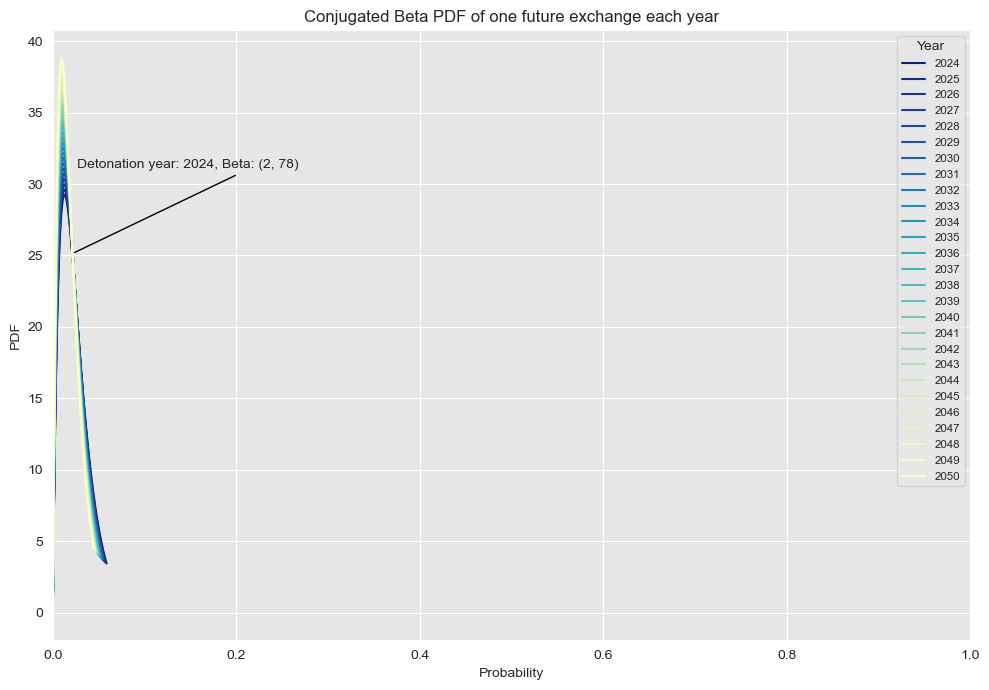

In [3]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (10, 7))
sns.lineplot(data=oneNY_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r").set(
    title="Conjugated Beta PDF of one future exchange each year", xlabel = "Probability")
# Annotate in-plot label

def PDF_interp(df:pd.DataFrame, year:int, median_prob:float) -> float:
    subset_df = df[df["year"] == year]
    cs_func = CubicSpline(subset_df['linspace'], subset_df["PDF"])
    y_val = cs_func(median_prob)

    return y_val
    
oneNY_betaRound = [np.round(num, 6) for num in oneNY_beta]
order = pd.Series(oneNY_betaRound).astype("str")

#sns.scatterplot(x=oneNY_betaRound, y=0, hue=order, palette="YlGnBu_r",
#                legend="full", marker="^")

median_2024 = oneNY_beta[2024-datetime.now().year]

ax.annotate(f"Detonation year: 2024, Beta: (2, 78)",
            xy=(median_2024, PDF_interp(oneNY_df, 2024, median_2024)), xytext=(median_2024+0.005, PDF_interp(oneNY_df, 2024, median_2024)+6),
            arrowprops=dict(color="black", arrowstyle='-',
            connectionstyle="arc,angleA=0,angleB=35,armA=70,armB=0,rad=0"), ha='left')

ax.legend(title = "Year", ncol = 1, fontsize = "small")
ax.set_xlim(left=0, right=1)

fig.tight_layout()
plt.savefig("../docs/Conj_BetaNY.png")
plt.show()

/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/christop

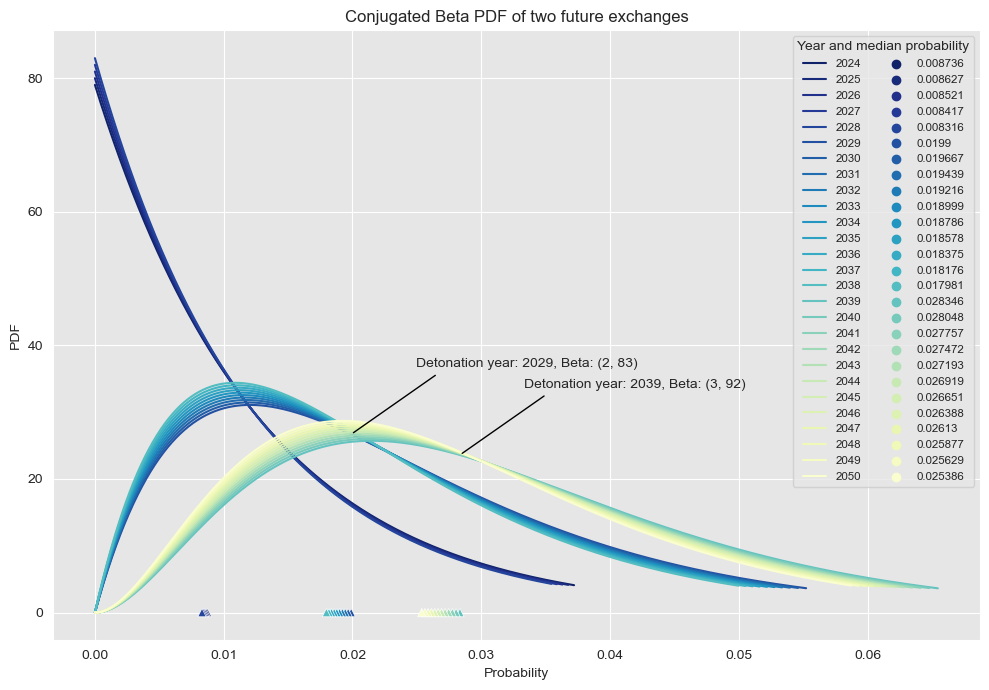

In [4]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.lineplot(data=two_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r").set(
    title="Conjugated Beta PDF of two future exchanges", xlabel = "Probability")

two_betaRound = [np.round(num, 6) for num in two_beta]
order = pd.Series(two_betaRound).astype("str")

sns.scatterplot(x=two_beta, y=0, hue=order, palette="YlGnBu_r",
                legend="full", marker="^")

ax.legend(title = "Year and median probability", ncol = 2, fontsize = "small")

median_2029 = two_beta[2029-datetime.now().year]
median_2039 = two_beta[2039-datetime.now().year]

ax.annotate(f"Detonation year: 2029, Beta: (2, 83)", 
               xy=(median_2029, PDF_interp(two_df, 2029, median_2029)), xytext=(median_2029+0.005, PDF_interp(two_df, 2029, median_2029)+10),
               arrowprops=dict(color="black", arrowstyle='-',
               connectionstyle="arc,angleA=0,angleB=35,armA=100,armB=110,rad=0"), ha='left')
ax.annotate(f"Detonation year: 2039, Beta: (3, 92)", 
               xy=(median_2039, PDF_interp(two_df, 2039, median_2039)), xytext=(median_2039+0.005, PDF_interp(two_df, 2039, median_2039)+10),
               arrowprops=dict(color="black", arrowstyle='-',
               connectionstyle="arc,angleA=0,angleB=35,armA=25,armB=110,rad=0"), ha='left')

fig.tight_layout()
plt.savefig("../docs/Conj_Beta2D.png")
plt.show()

/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/christop

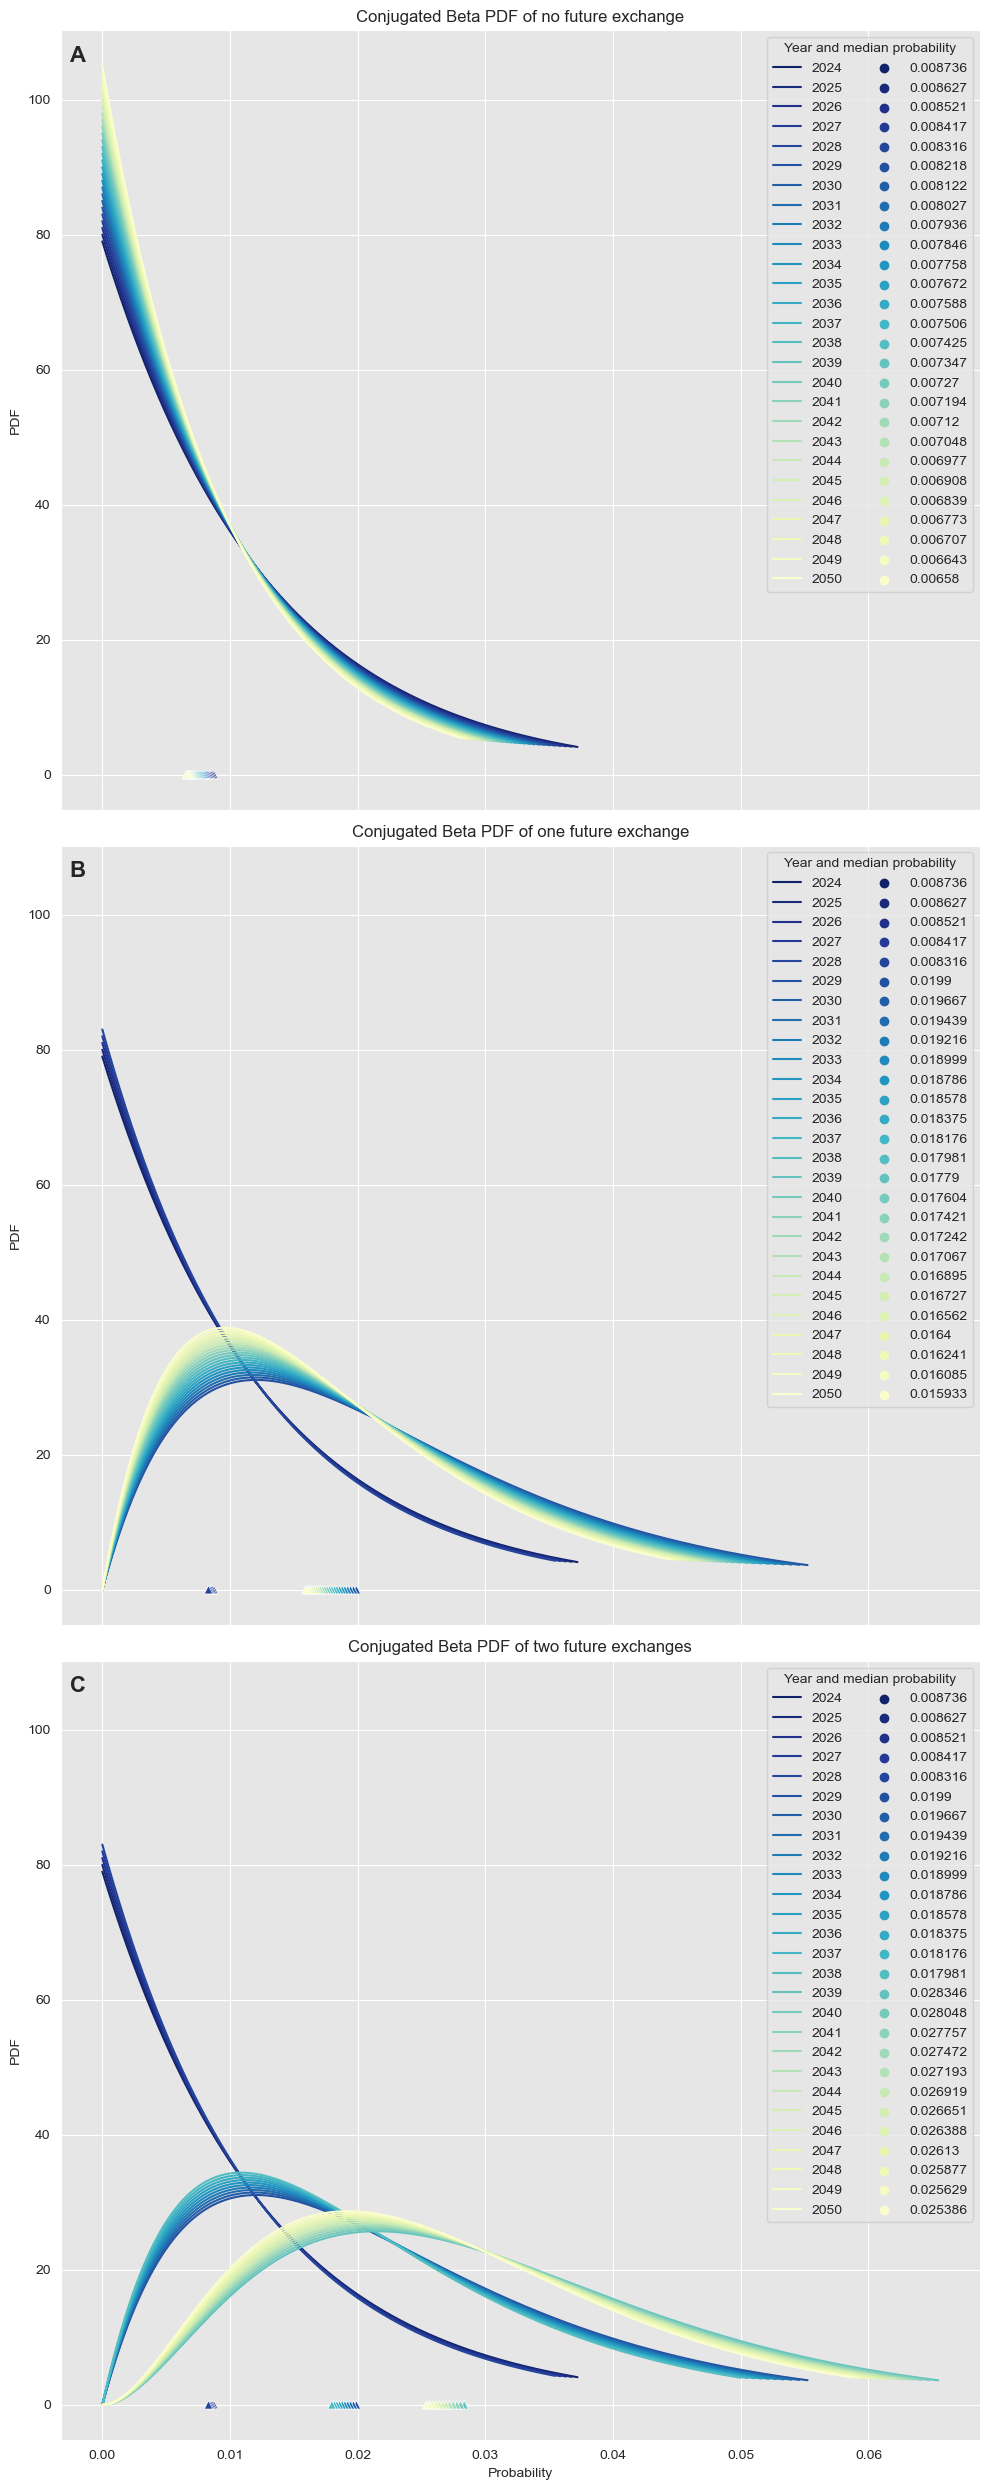

In [5]:
fig, ax = plt.subplots(3,1, figsize = (10, 25), sharey = True, sharex = True)
sns.lineplot(data=peace_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[0]).set(
    title="Conjugated Beta PDF of no future exchange", xlabel = None)
sns.lineplot(data=one_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[1]).set(
    title="Conjugated Beta PDF of one future exchange", xlabel = None)
sns.lineplot(data=two_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[2]).set(
    title="Conjugated Beta PDF of two future exchanges", xlabel = "Probability")

p_betaRound = [np.round(num, 6) for num in peace_beta]
one_betaRound = [np.round(num, 6) for num in one_beta]
two_betaRound = [np.round(num, 6) for num in two_beta]

p_order = pd.Series(p_betaRound).astype("str")
one_order = pd.Series(one_betaRound).astype("str")
two_order = pd.Series(two_betaRound).astype("str")

sns.scatterplot(x=peace_beta, y=0, hue=p_order, palette="YlGnBu_r", ax=ax[0],
                legend="full", marker="^")
sns.scatterplot(x=one_beta, y=0, hue=one_order, palette="YlGnBu_r", ax=ax[1],
                legend="full", marker="^")
sns.scatterplot(x=two_beta, y=0, hue=two_order, palette="YlGnBu_r", ax=ax[2],
                legend="full", marker="^")

labels = ['A', 'B', 'C']
for i, label in enumerate(labels):
     ax[i].text(0.01, 0.98, label, transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

ax[0].legend(title = "Year and median probability", ncol = 2)
ax[1].legend(title = "Year and median probability", ncol = 2)
ax[2].legend(title = "Year and median probability", ncol = 2)

fig.tight_layout()
plt.savefig("../docs/Conj_BetaV.png")
plt.show()

/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/christop

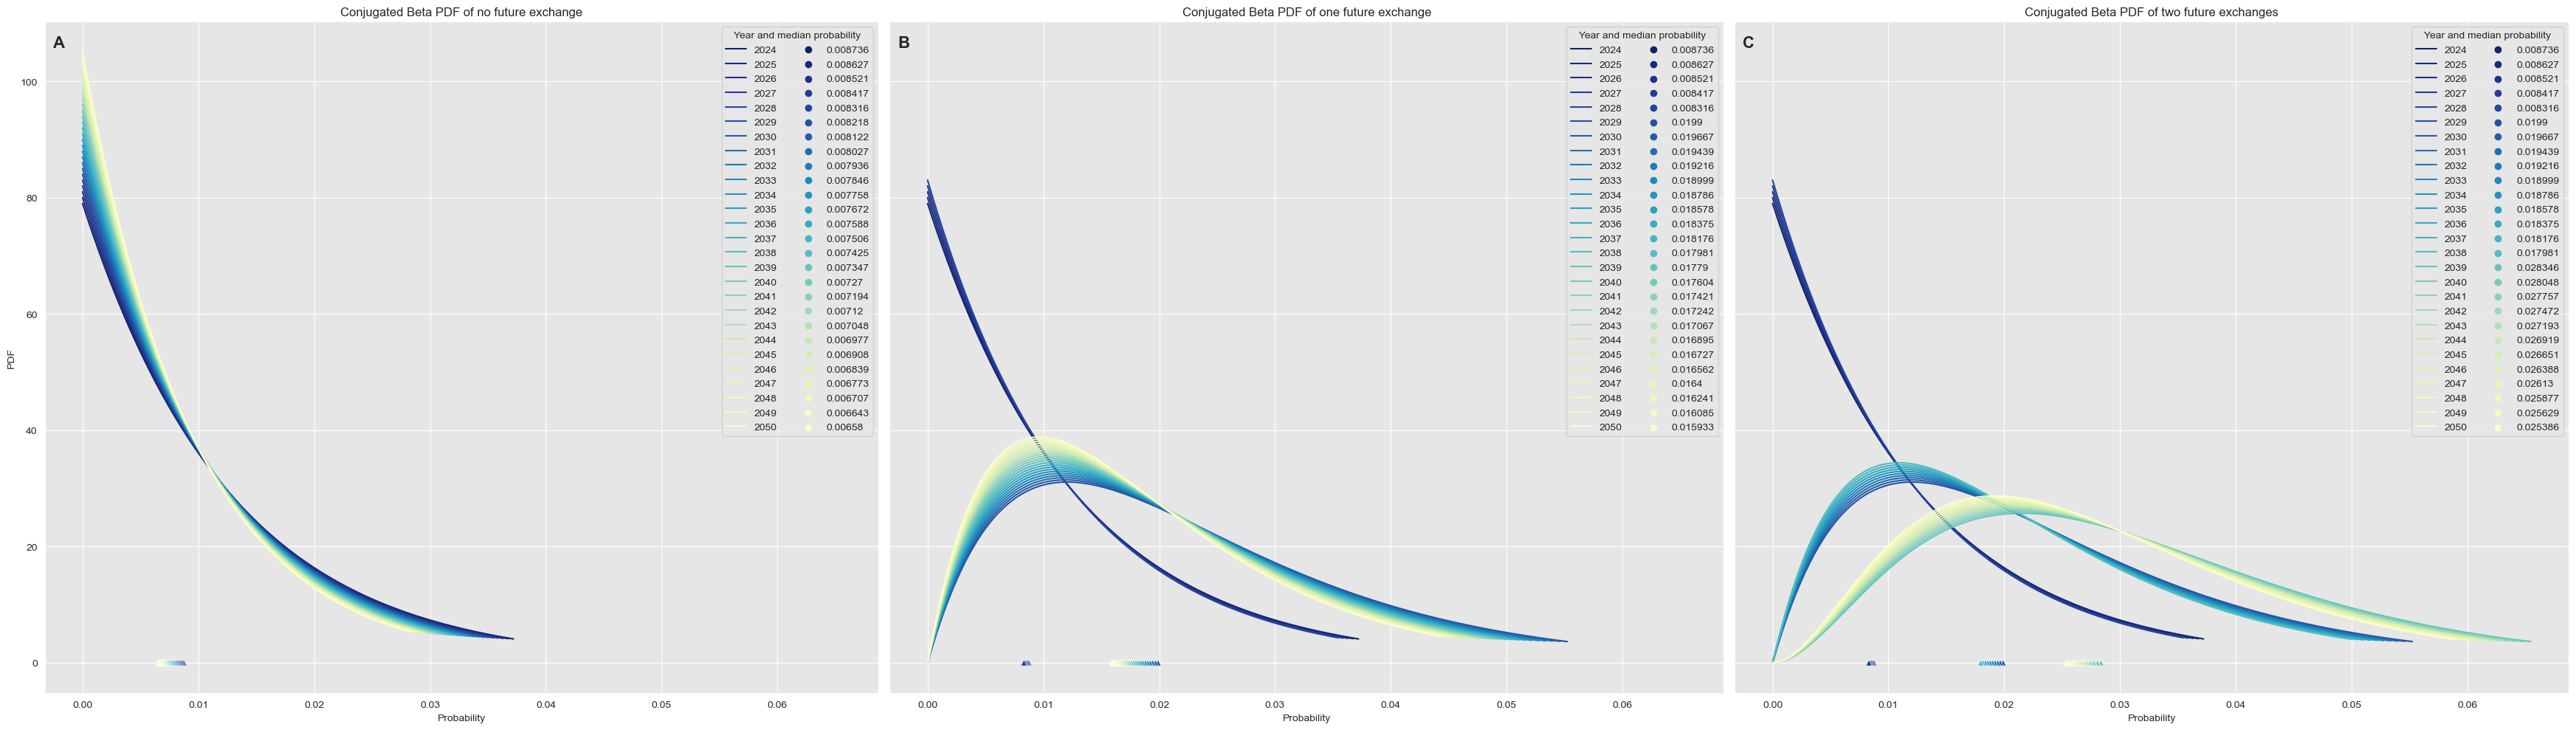

In [6]:
fig, ax = plt.subplots(1,3, figsize = (35, 10), sharey = True, sharex = True)
sns.lineplot(data=peace_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[0]).set(
    title="Conjugated Beta PDF of no future exchange", xlabel = "Probability")
sns.lineplot(data=one_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[1]).set(
    title="Conjugated Beta PDF of one future exchange", xlabel = "Probability")
sns.lineplot(data=two_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[2]).set(
    title="Conjugated Beta PDF of two future exchanges", xlabel = "Probability")

p_betaRound = [np.round(num, 6) for num in peace_beta]
one_betaRound = [np.round(num, 6) for num in one_beta]
two_betaRound = [np.round(num, 6) for num in two_beta]

p_order = pd.Series(p_betaRound).astype("str")
one_order = pd.Series(one_betaRound).astype("str")
two_order = pd.Series(two_betaRound).astype("str")

sns.scatterplot(x=peace_beta, y=0, hue=p_order, palette="YlGnBu_r", ax=ax[0],
                legend="full", marker="^")
sns.scatterplot(x=one_beta, y=0, hue=one_order, palette="YlGnBu_r", ax=ax[1],
                legend="full", marker="^")
sns.scatterplot(x=two_beta, y=0, hue=two_order, palette="YlGnBu_r", ax=ax[2],
                legend="full", marker="^")

labels = ['A', 'B', 'C']
for i, label in enumerate(labels):
     ax[i].text(0.01, 0.98, label, transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

ax[0].legend(title = "Year and median probability", ncol = 2)
ax[1].legend(title = "Year and median probability", ncol = 2)
ax[2].legend(title = "Year and median probability", ncol = 2)

fig.tight_layout()
plt.savefig("../docs/Conj_BetaH.png")
plt.show()

/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/christop

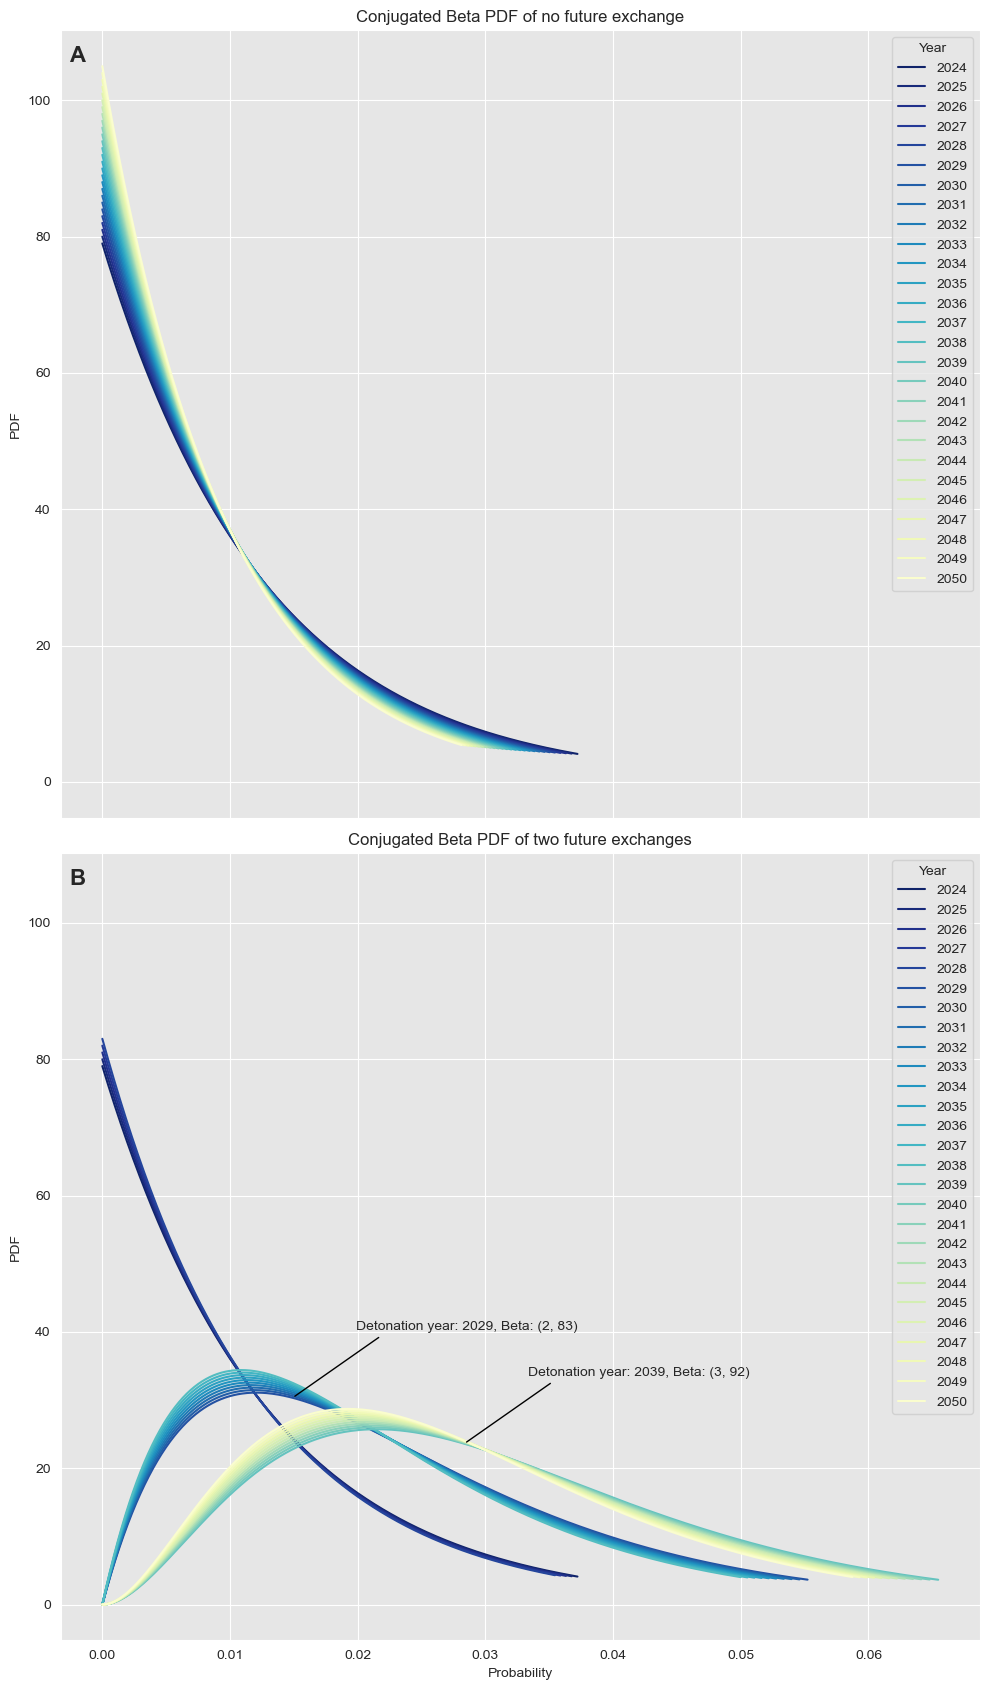

In [7]:
fig, ax = plt.subplots(2,1, figsize = (10, 17), sharey = True, sharex = True)

sns.lineplot(data=peace_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[0]).set(
    title="Conjugated Beta PDF of no future exchange", xlabel = None)
sns.lineplot(data=two_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[1]).set(
    title="Conjugated Beta PDF of two future exchanges", xlabel = "Probability")

median_2029 = two_beta[2029-datetime.now().year] - 0.005
median_2039 = two_beta[2039-datetime.now().year]

ax[1].annotate(f"Detonation year: 2029, Beta: (2, 83)", 
               xy=(median_2029, PDF_interp(two_df, 2029, median_2029)), xytext=(median_2029+0.005, PDF_interp(two_df, 2029, median_2029)+10),
               arrowprops=dict(color="black", arrowstyle='-',
               connectionstyle="arc,angleA=0,angleB=35,armA=100,armB=110,rad=0"), ha='left')
ax[1].annotate(f"Detonation year: 2039, Beta: (3, 92)", 
               xy=(median_2039, PDF_interp(two_df, 2039, median_2039)), xytext=(median_2039+0.005, PDF_interp(two_df, 2039, median_2039)+10),
               arrowprops=dict(color="black", arrowstyle='-',
               connectionstyle="arc,angleA=0,angleB=35,armA=25,armB=110,rad=0"), ha='left')
    
p_betaRound = [np.round(num, 6) for num in peace_beta]
two_betaRound = [np.round(num, 6) for num in two_beta]

p_order = pd.Series(p_betaRound).astype("str")
two_order = pd.Series(two_betaRound).astype("str")

#sns.scatterplot(x=peace_beta, y=0, hue=p_order, palette="YlGnBu_r", ax=ax[0],
#                legend="full", marker="^")
#sns.scatterplot(x=two_beta, y=0, hue=two_order, palette="YlGnBu_r", ax=ax[1],
#                legend="full", marker="^")

labels = ['A', 'B']
for i, label in enumerate(labels):
     ax[i].text(0.01, 0.98, label, transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

ax[0].legend(title = "Year", ncol = 1)
ax[1].legend(title = "Year", ncol = 1)

fig.tight_layout()
plt.savefig("../docs/Conj_BetaV01.png")
plt.show()

/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopherchan/mambaforge/envs/ds_asrs_trade/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/christop

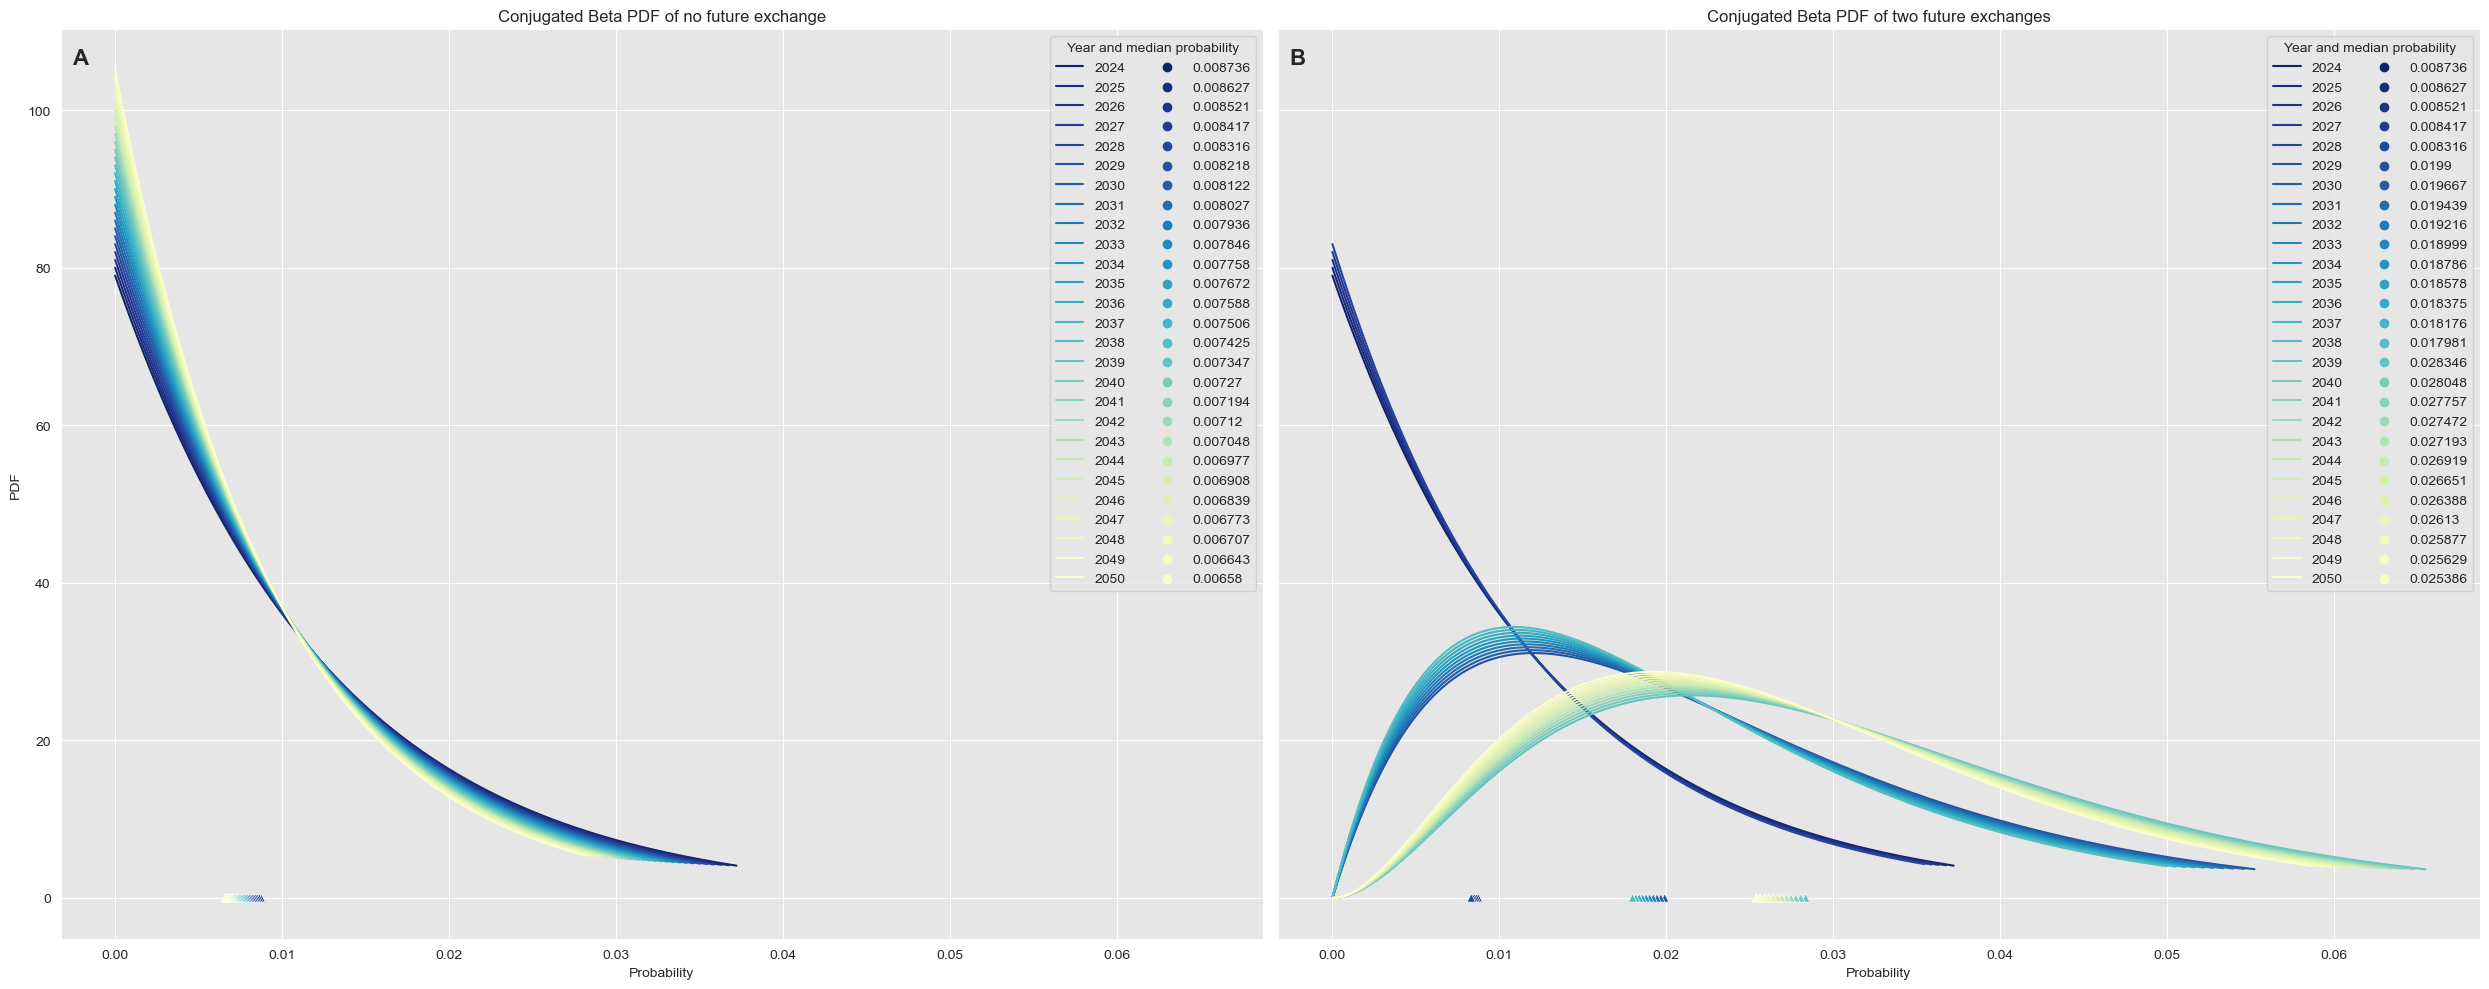

In [8]:
fig, ax = plt.subplots(1,2, figsize = (25, 10), sharey = True, sharex = True)
sns.lineplot(data=peace_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[0]).set(
    title="Conjugated Beta PDF of no future exchange", xlabel = "Probability")
sns.lineplot(data=two_df, x="linspace", y="PDF", hue="year", palette="YlGnBu_r", ax=ax[1]).set(
    title="Conjugated Beta PDF of two future exchanges", xlabel = "Probability")

p_betaRound = [np.round(num, 6) for num in peace_beta]
two_betaRound = [np.round(num, 6) for num in two_beta]

p_order = pd.Series(p_betaRound).astype("str")
two_order = pd.Series(two_betaRound).astype("str")

sns.scatterplot(x=peace_beta, y=0, hue=p_order, palette="YlGnBu_r", ax=ax[0],
                legend="full", marker="^")
sns.scatterplot(x=two_beta, y=0, hue=two_order, palette="YlGnBu_r", ax=ax[1],
                legend="full", marker="^")

labels = ['A', 'B']
for i, label in enumerate(labels):
     ax[i].text(0.01, 0.98, label, transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

ax[0].legend(title = "Year and median probability", ncol = 2)
ax[1].legend(title = "Year and median probability", ncol = 2)

fig.tight_layout()
plt.savefig("../docs/Conj_BetaH01.png")
plt.show()

In [9]:
def median_extract_df(Round_df:pd.DataFrame) -> pd.DataFrame:
    median_df = pd.DataFrame({
        "Year": np.arange(2024, 2051, 1),
        "Median Probability": Round_df
    })
    
    pivot_median = pd.pivot_table(median_df, columns="Year", values="Median Probability")
    pivot_median.index.name = "Year"
    
    return pivot_median

peaceED_df = median_extract_df(p_betaRound)
twoED_df = median_extract_df(two_betaRound)
oneEYED_df = median_extract_df(oneNY_betaRound)

peaceED_df.to_csv(f"{data_output}/peaceED_df.csv", sep = ",", index=True)
twoED_df.to_csv(f"{data_output}/twoED_df.csv", sep = ",", index=True)
oneEYED_df.to_csv(f"{data_output}/oneEYED_df.csv", sep = ",", index=True)

print(peaceED_df)
print(twoED_df)
print(oneEYED_df)

Year                    2024      2025      2026      2027      2028  \
Year                                                                   
Median Probability  0.008736  0.008627  0.008521  0.008417  0.008316   

Year                    2029      2030      2031      2032      2033  ...  \
Year                                                                  ...   
Median Probability  0.008218  0.008122  0.008027  0.007936  0.007846  ...   

Year                    2041     2042      2043      2044      2045      2046  \
Year                                                                            
Median Probability  0.007194  0.00712  0.007048  0.006977  0.006908  0.006839   

Year                    2047      2048      2049     2050  
Year                                                       
Median Probability  0.006773  0.006707  0.006643  0.00658  

[1 rows x 27 columns]
Year                    2024      2025      2026      2027      2028    2029  \
Year                    

In [10]:
def objective_function(params, x1:float, x2:float, p1:float, p2:float) -> list[float, float]:
    alpha, beta_ = params
    cdf_p1 = beta.cdf(x1, alpha, beta_)
    cdf_p2 = beta.cdf(x2, alpha, beta_)
    return [cdf_p1 - p1, cdf_p2 - p2]

def find_alpha_beta(x1:float, x2:float, p1:float, p2:float) -> sp.optimize.OptimizeResult:
    # Continuous uniform distribution
    mean = (x1 + x2) / 2
    variance = ((x2 - x1) ** 2) / 12
    #alpha_initial = ((1 - mean) / variance - 1 / mean) * mean ** 2
    #beta_initial = alpha_initial * (1 / mean - 1)
    alpha_initial = mean/(mean+variance)
    beta_initial = (mean*variance)/(mean+variance)**2 * (mean+variance+1)

    initial_guess = [alpha_initial, beta_initial]

    bounds = ([0.001, 0.001], [1000, 1000])  # Bounds for alpha and beta
    sol = least_squares(objective_function, initial_guess, bounds=bounds, args=(x1, x2, p1, p2))

    if sol.success:
        return sol.x
    else:
        return None, None

# 100 and 1000 in proportion to max nukes by halfway between now and 2050
x1 = 100/max_nukes
x2 = 1000/max_nukes
p1 = 0.61 # P(100 nukes) = 39% = 0.39 (1-0.61)
p2 = 0.89 # P(1000 nukes) = 11% = 0.11 (1-0.89)

alpha, beta_ = find_alpha_beta(x1, x2, p1, p2)

print(f"alpha = {alpha}, beta = {beta_}")

alpha = 0.18906832579815466, beta = 5.0288625895145


Percentile for 550 detonations: 0.00024127467856023915, 8000 detonations 0.07498134453034738, 75th pct: 0.034215694670619204, 95th pct: 0.19186343195650898
Probability of Large Nuclear War = 0.4497182910628658


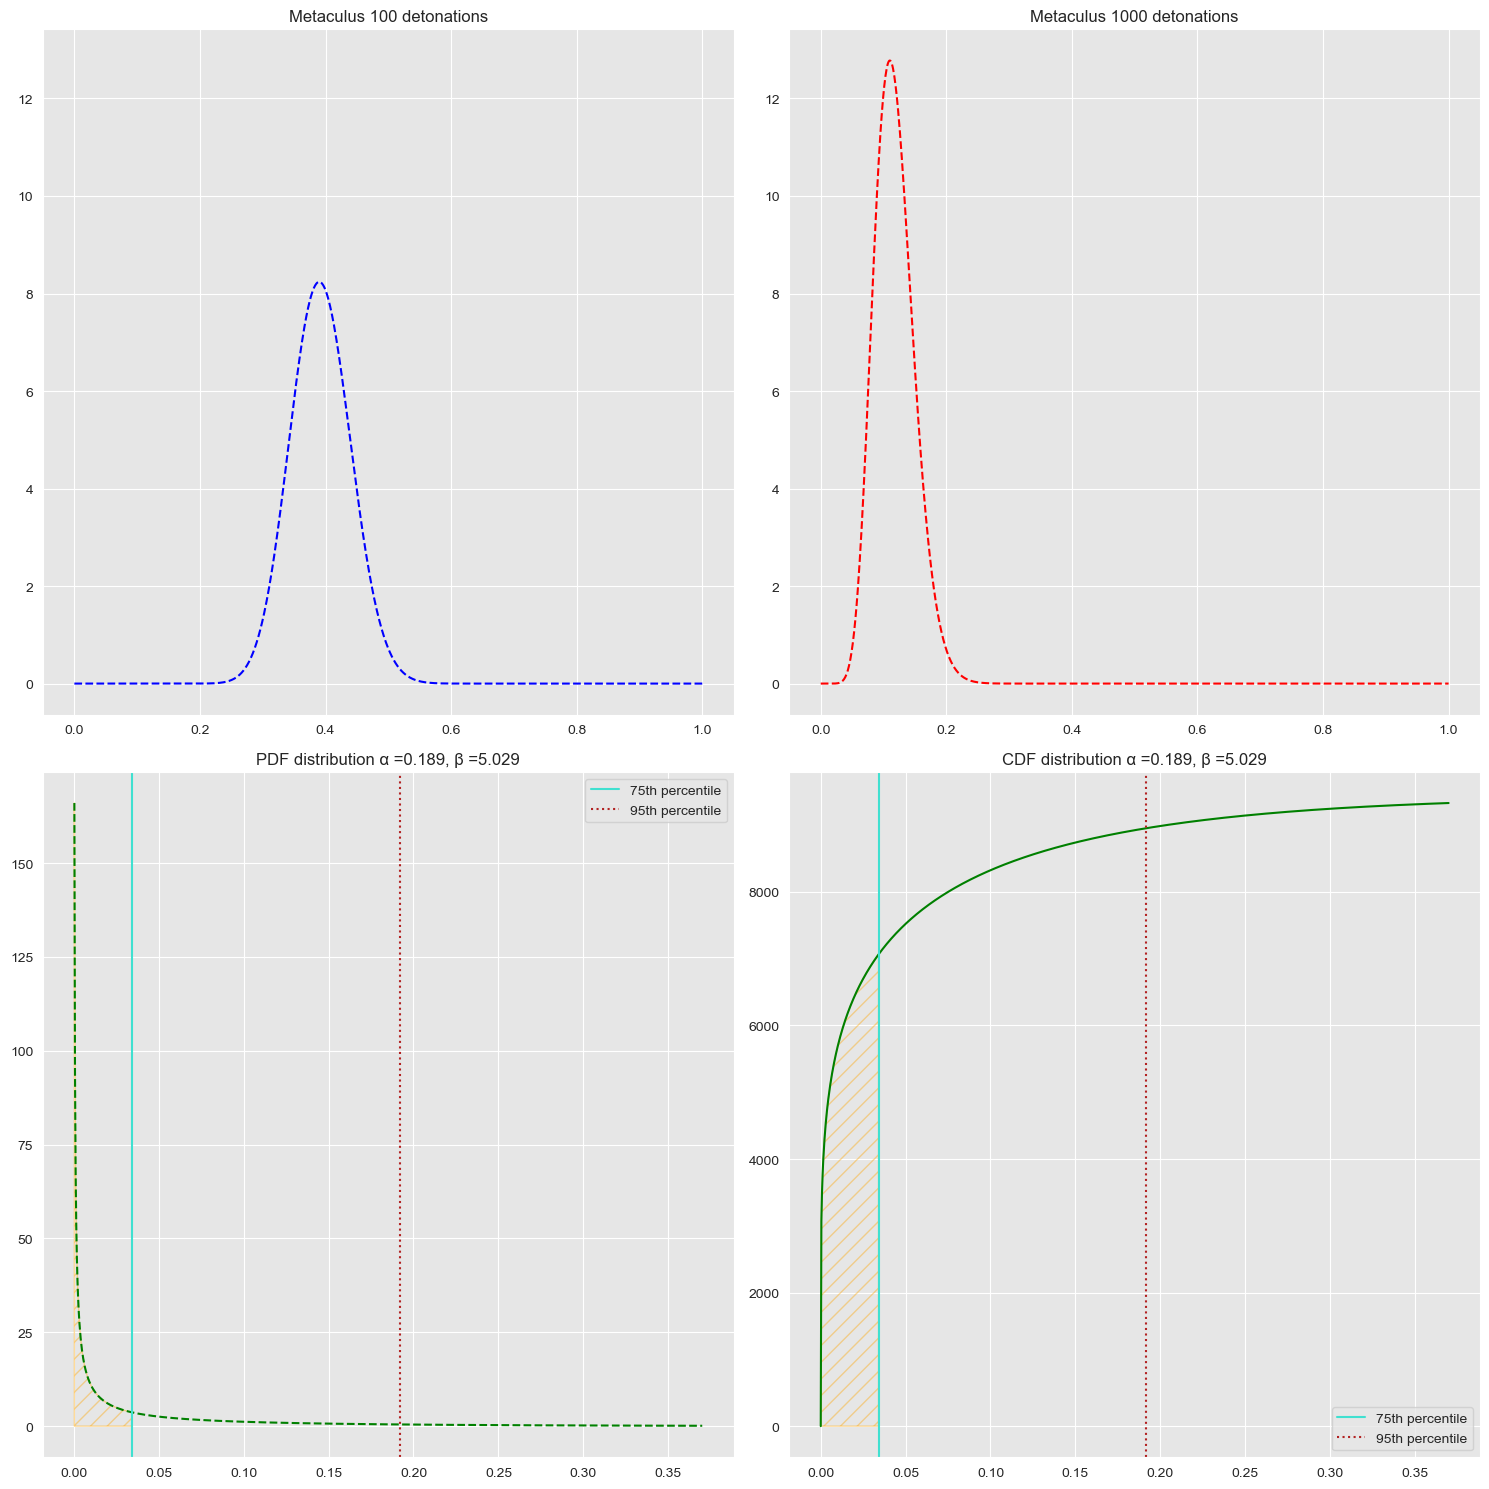

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))

x_0 = np.linspace(beta.ppf(0, 0.39*100+1, (1-0.39)*100+1),
                beta.ppf(1, 0.39*100+1, (1-0.39)*100+1), 1000)

x_1 = np.linspace(beta.ppf(0, 0.11*100+1, (1-0.11)*100+1),
                beta.ppf(1, 0.11*100+1, (1-0.11)*100+1), 1000)

pdf_100 = beta.pdf(x_1, 0.39*100+1, (1-0.39)*100+1)
ax[0, 0].plot(x_0, pdf_100, "b--")
ax[0, 0].set_title("Metaculus 100 detonations")

pdf_1000 = beta.pdf(x_1, 0.11*100+1, (1-0.11)*100+1)
ax[0, 1].sharey(ax[0, 0])
ax[0, 1].plot(x_1, pdf_1000, "r--")
ax[0, 1].set_title("Metaculus 1000 detonations")

x_2 = np.linspace(beta.ppf(0, alpha, beta_),
                  beta.ppf(0.99, alpha, beta_), 1000)

pdf = beta.pdf(x_2, alpha, beta_)
cdf = beta.cdf(x_2, alpha, beta_)

perc75 = beta.ppf(.75, alpha, beta_)
perc95 = beta.ppf(.95, alpha, beta_)
perc99 = beta.ppf(.99, alpha, beta_)

# Find percentile for 27 Tg, climatic effect for ASRS
interp_cdf = CubicSpline(cdf, x_2)

# Use ppf and interpolated CDF to find percentile
p8000 = interp_cdf(8000/max_nukes)
p3055 = interp_cdf(3055/max_nukes)
p550 = interp_cdf(550/max_nukes)
assert p550 < perc75, "Percentile is not correct"
print(f"Percentile for 550 detonations: {p550}, 8000 detonations {p8000}, 75th pct: {perc75}, 95th pct: {perc95}")

def integrand(x, a, b):
    return beta.pdf(x, a, b)
pLNW = sp.integrate.quad(integrand, p550, perc75, args=(alpha, beta_))[0]
print(f"Probability of Large Nuclear War = {pLNW}")

# PDF Plot
ax[1, 0].plot(x_2, pdf, "g--")
ax[1, 0].fill_between(x_2, pdf, where=(x_2>=p550) & (x_2<=perc75), alpha = 0.4, facecolor = "none", edgecolor = "orange", hatch = "//")
ax[1, 0].axvline(x = perc75, color = "turquoise", label = "75th percentile")
ax[1, 0].axvline(x = perc95, color = "firebrick", linestyle = ":", label = "95th percentile")
ax[1, 0].set_title(f"PDF distribution \u03B1 ={np.round(alpha, 3)}, \u03B2 ={np.round(beta_, 3)}")
ax[1, 0].legend()

# CDF Plot
ax[1, 1].plot(x_2, cdf*max_nukes, "g")
ax[1, 1].fill_between(x_2, cdf*max_nukes, where=(x_2>=p550) & (x_2<=perc75), alpha = 0.4, facecolor = "none", edgecolor = "orange", hatch = "//")
ax[1, 1].axvline(x = perc75, color = "turquoise", label = "75th percentile")
ax[1, 1].axvline(x = perc95, color = "firebrick", linestyle = ":", label = "95th percentile")
ax[1, 1].set_title(f"CDF distribution \u03B1 ={np.round(alpha, 3)}, \u03B2 ={np.round(beta_, 3)}")
ax[1, 1].legend()

# Show the plot
fig.tight_layout()
plt.savefig("../docs/interCDF_LNW.png")
plt.show()

In [25]:
# Accounting for median estimate 2024 UN population prospect

UNmedpop_df = pd.read_excel("../data/01_raw/WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL.xlsx", sheet_name="Medium variant", engine='openpyxl',
                         skiprows=15, usecols="A:M", header=1)
UNlowpop_df = pd.read_excel("../data/01_raw/WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL.xlsx", sheet_name="Low variant", engine='openpyxl',
                         skiprows=15, usecols="A:M", header=1)
UNhighpop_df = pd.read_excel("../data/01_raw/WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL.xlsx", sheet_name="High variant", engine='openpyxl',
                         skiprows=15, usecols="A:M", header=1)

UNWestimate_df = UNmedpop_df[UNmedpop_df["Region, subregion, country or area *"] == "World"]
UNWestimate_df = UNWestimate_df[UNWestimate_df["Year"] <= 2050]

# Low and High processing
UNlow_df = UNlowpop_df[UNlowpop_df["Region, subregion, country or area *"] == "World"]
UNlow_df = UNlow_df[UNlow_df["Year"] <= 2050]
UNhigh_df = UNhighpop_df[UNhighpop_df["Region, subregion, country or area *"] == "World"]
UNhigh_df = UNhigh_df[UNhigh_df["Year"] <= 2050]

UNWestimate_df["Julypop_medium"] = UNWestimate_df["Total Population, as of 1 July (thousands)"] * 1000
UNWestimate_df["Julypop_medium"] = UNWestimate_df["Julypop_medium"].round(0).astype(int)

UNlow_df["Julypop_low"] = UNlow_df["Total Population, as of 1 July (thousands)"] * 1000
UNlow_df["Julypop_low"] = UNlow_df["Julypop_low"].round(0).astype(int)
UNhigh_df["Julypop_high"] = UNhigh_df["Total Population, as of 1 July (thousands)"] * 1000
UNhigh_df["Julypop_high"] = UNhigh_df["Julypop_high"].round(0).astype(int)

UNWestimate_df["Julypop_low"] = UNlow_df["Julypop_low"]
UNWestimate_df["Julypop_high"] = UNhigh_df["Julypop_high"]

In [27]:
assert (UNWestimate_df["Julypop_high"] > UNWestimate_df["Julypop_medium"]).all()
assert (UNWestimate_df["Julypop_medium"] > UNWestimate_df["Julypop_low"]).all()

UNWestimate2_df = UNWestimate_df[["Year", "Julypop_medium", "Julypop_low", "Julypop_high"]]
UNWestimate2_df["Year"] = UNWestimate2_df["Year"].astype(int)
UNWestimate2_df


/var/folders/tz/q11qj2t518z2mqsm9xzdw7r00000gn/T/ipykernel_5648/3534536165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UNWestimate2_df["Year"] = UNWestimate2_df["Year"].astype(int)


,Year,Julypop_medium,Julypop_low,Julypop_high
0,2024,8161972572,8154697457,8169247456
1,2025,8231613070,8209792256,8253432834
2,2026,8300678395,8264300965,8337053643
3,2027,8369094344,8318123308,8420062971
4,2028,8436618886,8371006531,8502231504
5,2029,8503285323,8418519563,8588039203
6,2030,8569124911,8460679168,8677546006
7,2031,8634119333,8501897197,8766330167
8,2032,8698229812,8542111873,8854369578
9,2033,8761449081,8581302825,8941670516


In [28]:
# Calculate percentage of predicted death from Xia et al. 2022
# UN WPP 2022 population (median projection) is 7951595433
from typing import Optional

def expected_deaths(year:int, deton:int, worldpop: Optional[int] = None) -> int:
  p_deton = 1-beta.cdf(deton/max_nukes, alpha, beta_)

  worldpop_2022 = 7951595433

  if worldpop == None:
    worldpop = worldpop_2022

  print(worldpop)
  match deton:
    case 100:
      xia_death = (27000000+255000000)/worldpop_2022
    case 250:
      xia_death = (127000000+2081000000)/worldpop_2022
    case 550:
      xia_death = (164000000+2512000000)/worldpop_2022
    case 4400:
      xia_death = (360000000+5341000000)/worldpop_2022
      
  ED = oneNY_beta[year-(datetime.now().year)]*p_deton*(worldpop*xia_death)
  
  print(f"{deton} detonation probability: {p_deton}")
  return(int(np.round(ED)))

# Xia et al. (2022) inputs 100kT yield
dummy_year = 2024

print(f"100 detonations at year {dummy_year} will result in {expected_deaths(dummy_year, 100)} expected deaths.")
print(f"250 detonations at year {dummy_year} will result in {expected_deaths(dummy_year, 250)} expected deaths.")
print(f"550 detonations at year {dummy_year} (min ASRS, global warming adjusted) will result in {expected_deaths(dummy_year, 550)} expected deaths.")
print(f"4400 detonations at year {dummy_year} will result in {expected_deaths(dummy_year, 4400)} expected deaths.")

7951595433
100 detonation probability: 0.39000000000970736
100 detonations at year 2024 will result in 2326511 expected deaths.
7951595433
250 detonation probability: 0.28183712518808834
250 detonations at year 2024 will result in 13164021 expected deaths.
7951595433
550 detonation probability: 0.18250122024372228
550 detonations at year 2024 (min ASRS, global warming adjusted) will result in 10331020 expected deaths.
7951595433
4400 detonation probability: 0.0037643597560895747
4400 detonations at year 2024 will result in 453977 expected deaths.


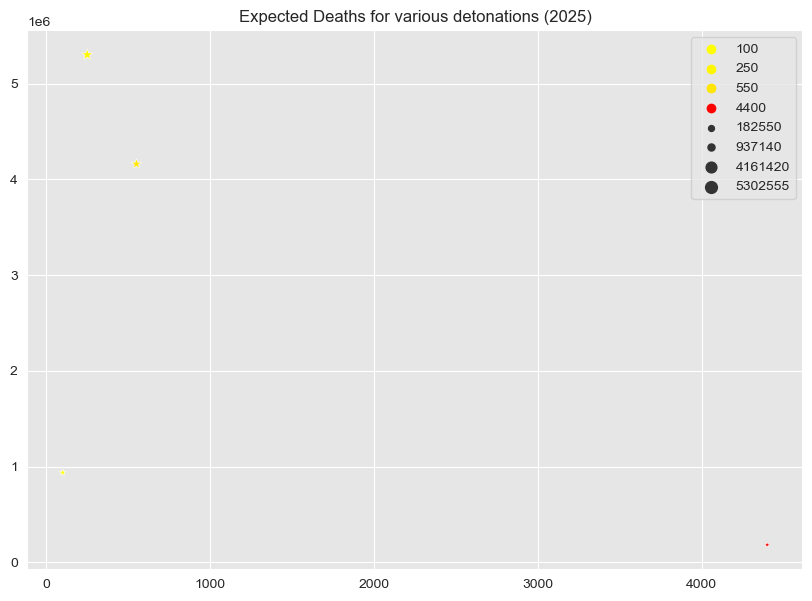

In [29]:
fig, ax = plt.subplots(figsize = (10, 7))

x = [100, 250, 550, 4400]
y = [937140, 5302555, 4161420, 182550]

sns.scatterplot(x=x, y=y, hue=x, size=y, palette="autumn_r",
                legend="auto", marker="*")

ax.set_title("Expected Deaths for various detonations (2025)")

plt.show()

In [30]:
print(len(np.repeat(np.arange(datetime.now().year+1, datetime.now().year+27, 1), 4)))
print(len(np.repeat(oneNY_beta, 4)))
print(len(np.tile([100, 250, 550, 4400], 26)))

104
108
104


In [31]:
ED_df = pd.DataFrame({
    "year": np.repeat(np.arange(datetime.now().year, datetime.now().year+27, 1), 4),
    "median_beta": np.repeat(oneNY_beta, 4),
    "Detonation_size": np.tile([100, 250, 550, 4400], 27),
    "Julypop_medium": np.repeat(UNWestimate2_df["Julypop_medium"], 4),
    "Julypop_low": np.repeat(UNWestimate2_df["Julypop_low"], 4),
    "Julypop_high": np.repeat(UNWestimate2_df["Julypop_high"], 4)
})

death_toll_m = []
death_toll_l = []
death_toll_h = []

for i, j, k in zip(ED_df["year"], ED_df["Detonation_size"], ED_df["Julypop_medium"]):
    death_toll_m.append(expected_deaths(i, j, k))
for i, j, k in zip(ED_df["year"], ED_df["Detonation_size"], ED_df["Julypop_low"]):
    death_toll_l.append(expected_deaths(i, j, k))
for i, j, k in zip(ED_df["year"], ED_df["Detonation_size"], ED_df["Julypop_high"]):
    death_toll_h.append(expected_deaths(i, j, k))

ED_df["Expected_deaths_medium"], ED_df["Expected_deaths_low"], ED_df["Expected_deaths_high"] = death_toll_m, death_toll_l, death_toll_h
print(ED_df.describe())

8161972572
100 detonation probability: 0.39000000000970736
8161972572
250 detonation probability: 0.28183712518808834
8161972572
550 detonation probability: 0.18250122024372228
8161972572
4400 detonation probability: 0.0037643597560895747
8231613070
100 detonation probability: 0.39000000000970736
8231613070
250 detonation probability: 0.28183712518808834
8231613070
550 detonation probability: 0.18250122024372228
8231613070
4400 detonation probability: 0.0037643597560895747
8300678395
100 detonation probability: 0.39000000000970736
8300678395
250 detonation probability: 0.28183712518808834
8300678395
550 detonation probability: 0.18250122024372228
8300678395
4400 detonation probability: 0.0037643597560895747
8369094344
100 detonation probability: 0.39000000000970736
8369094344
250 detonation probability: 0.28183712518808834
8369094344
550 detonation probability: 0.18250122024372228
8369094344
4400 detonation probability: 0.0037643597560895747
8436618886
100 detonation probability: 0.390

In [32]:
ED_df.head(n=8)

,year,median_beta,Detonation_size,Julypop_medium,Julypop_low,Julypop_high,Expected_deaths_medium,Expected_deaths_low,Expected_deaths_high
0,2024,0.021154,100,8161972572,8154697457,8169247456,2388064,2385935,2390192
0,2024,0.021154,250,8161972572,8154697457,8169247456,13512305,13500261,13524348
0,2024,0.021154,550,8161972572,8154697457,8169247456,10604350,10594898,10613802
0,2024,0.021154,4400,8161972572,8154697457,8169247456,465988,465572,466403
1,2025,0.020891,100,8231613070,8209792256,8253432834,2378461,2372156,2384766
1,2025,0.020891,250,8231613070,8209792256,8253432834,13457972,13422297,13493646
1,2025,0.020891,550,8231613070,8209792256,8253432834,10561710,10533713,10589706
1,2025,0.020891,4400,8231613070,8209792256,8253432834,464114,462884,465344


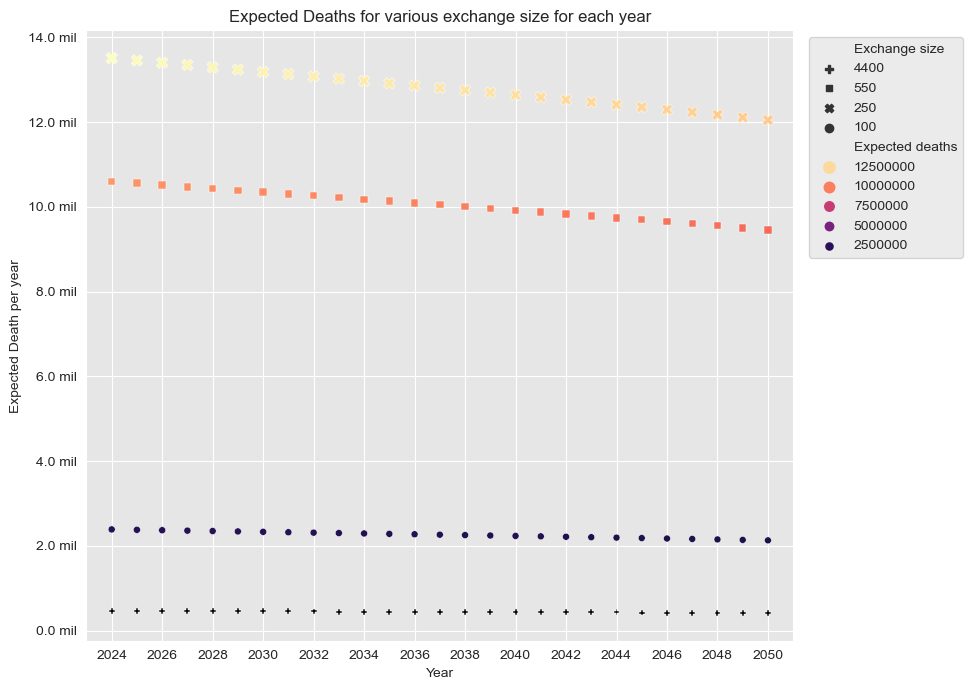

In [33]:
fig, ax = plt.subplots(figsize = (10, 7))

sns.scatterplot(data=ED_df, x="year", y="Expected_deaths_medium", hue="Expected_deaths_medium", size="Expected_deaths_medium",
                palette="magma", style="Detonation_size", legend="brief")
                
# Add labels to each data point                                                                                                                                                                             
#for i in range(len(ED_df)):                                                                                                                                                                                 
#    ax.text(x=ED_df.iloc[i]['year'], y=ED_df.iloc[i]['Expected_deaths'],                                                                                                                                   
#            s=str(int(ED_df.iloc[i]['Expected_deaths'])),                                                                                                                                                       
#            fontdict=dict(color='black', size=8),                                                                                                                                                          
#            ha='left', va='bottom', rotation=35)

ax.set_title("Expected Deaths for various exchange size for each year")
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
labels[0], labels[6] = "Expected deaths", "Exchange size"
order = [6, 10, 9, 8, 7, 0, 5, 4, 3, 2, 1]

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper right", bbox_to_anchor=(1.25, 1))
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x/1e6} mil"))

ax.set_xlabel("Year")
first_year = ED_df['year'].min()
last_year = ED_df['year'].max()
ax.set_xticks(range(first_year, last_year + 1, 2))
ax.set_xlim(first_year-1, last_year+1)

ax.set_ylabel("Expected Death per year")

# Show the plot
fig.tight_layout()
plt.savefig("../docs/Expected_deaths.png")
plt.show()

In [34]:
subset2550_DF = ED_df[ED_df["year"].isin([2025, 2037, 2050])]
subset2550_DF

,year,median_beta,Detonation_size,Julypop_medium,Julypop_low,Julypop_high,Expected_deaths_medium,Expected_deaths_low,Expected_deaths_high
1,2025,0.020891,100,8231613070,8209792256,8253432834,2378461,2372156,2384766
1,2025,0.020891,250,8231613070,8209792256,8253432834,13457972,13422297,13493646
1,2025,0.020891,550,8231613070,8209792256,8253432834,10561710,10533713,10589706
1,2025,0.020891,4400,8231613070,8209792256,8253432834,464114,462884,465344
13,2037,0.018176,100,9005152624,8705932008,9304834389,2263832,2188610,2339170
13,2037,0.018176,250,9005152624,8705932008,9304834389,12809371,12383745,13235653
13,2037,0.018176,550,9005152624,8705932008,9304834389,10052693,9718665,10387236
13,2037,0.018176,4400,9005152624,8705932008,9304834389,441746,427068,456447
26,2050,0.015933,100,9664378587,8942254548,10395097515,2129726,1970592,2290753
26,2050,0.015933,250,9664378587,8942254548,10395097515,12050559,11150139,12961696


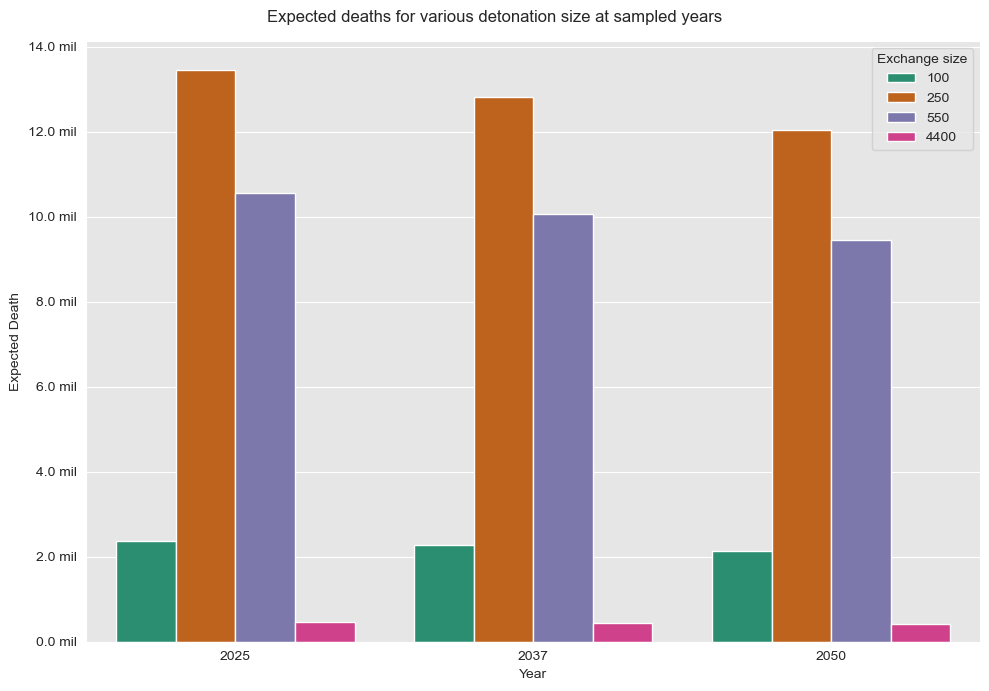

In [35]:
fig, ax = plt.subplots(figsize = (10, 7))

cblind = ["#1b9e77", "#fc8d62", "#1f78b4", "#FFA07A"]

sns.barplot(subset2550_DF, x = "year", y = "Expected_deaths_medium",
            hue = "Detonation_size", palette = "Dark2")

ax.legend(loc="upper right", bbox_to_anchor=(1, 1), title = "Exchange size")
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x/1e6} mil"))

plt.suptitle("Expected deaths for various detonation size at sampled years")

ax.set_xlabel("Year")
ax.set_ylabel("Expected Death")

plt.savefig("../docs/one_EY_hist.png")
plt.tight_layout()
plt.show()

In [36]:
subset2550_DF

,year,median_beta,Detonation_size,Julypop_medium,Julypop_low,Julypop_high,Expected_deaths_medium,Expected_deaths_low,Expected_deaths_high
1,2025,0.020891,100,8231613070,8209792256,8253432834,2378461,2372156,2384766
1,2025,0.020891,250,8231613070,8209792256,8253432834,13457972,13422297,13493646
1,2025,0.020891,550,8231613070,8209792256,8253432834,10561710,10533713,10589706
1,2025,0.020891,4400,8231613070,8209792256,8253432834,464114,462884,465344
13,2037,0.018176,100,9005152624,8705932008,9304834389,2263832,2188610,2339170
13,2037,0.018176,250,9005152624,8705932008,9304834389,12809371,12383745,13235653
13,2037,0.018176,550,9005152624,8705932008,9304834389,10052693,9718665,10387236
13,2037,0.018176,4400,9005152624,8705932008,9304834389,441746,427068,456447
26,2050,0.015933,100,9664378587,8942254548,10395097515,2129726,1970592,2290753
26,2050,0.015933,250,9664378587,8942254548,10395097515,12050559,11150139,12961696


KeyError: 0

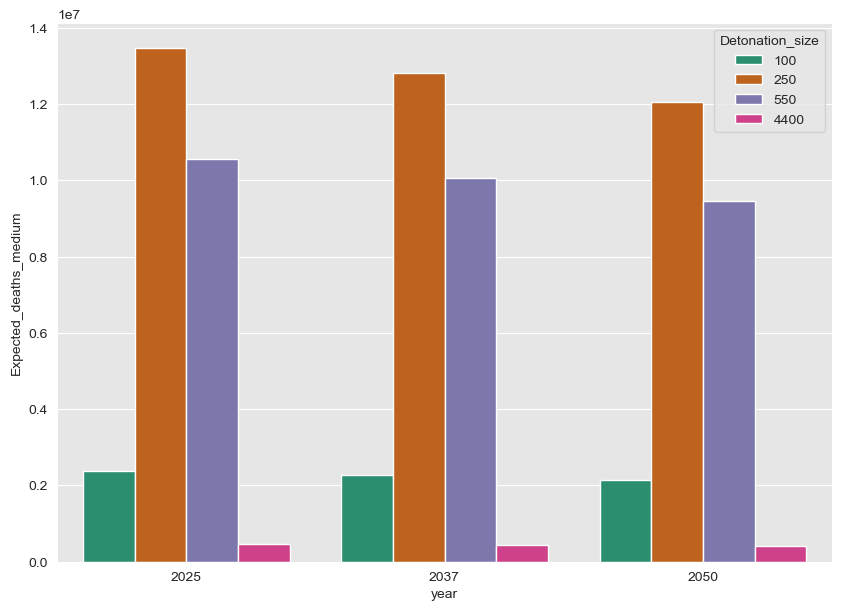

In [58]:
fig, ax = plt.subplots(figsize = (10, 7))

cblind = ["#1b9e77", "#fc8d62", "#1f78b4", "#FFA07A"]

sns.barplot(subset2550_DF, x = "year", y = "Expected_deaths_medium",
            hue = "Detonation_size", palette = "Dark2")

yeer_low = subset2550_DF["Expected_deaths_medium"] - subset2550_DF["Expected_deaths_low"]
yeer_high = subset2550_DF["Expected_deaths_high"] - subset2550_DF["Expected_deaths_medium"]

x = ax.get_xticks()

for i in range(len(x)):
    plt.errorbar(x[i], subset2550_DF["Expected_deaths_medium"][i], yerr=[[yerr_low[i]], [yerr_high[i]]], 
                 fmt='none', ecolor='black', capsize=4)

ax.legend(loc="upper right", bbox_to_anchor=(1, 1), title = "Exchange size")
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x/1e6} mil"))

plt.suptitle("Expected deaths for various detonation size at sampled years")

ax.set_xlabel("Year")
ax.set_ylabel("Expected Death")

plt.savefig("../docs/one_EY_hist.png")
plt.tight_layout()